# Chellenge 8

## Challenge 8.1

In [84]:
myinput = '/home/fmuinos/projects/adventofcode/2016/ferran/inputs/input8.txt'

In [85]:
import matplotlib.pyplot as plt
import numpy as np

class Screen(set):
    
    def __init__(self, *args, **kwds):
        super(Screen, self).__init__(*args, **kwds)

    def rect(self, a, b):
        for i in range(a):
            for j in range(b):
                self.add((i,j))

    def col(self, a, b):
        tmp = set([])
        for j in range(6):
            if (a,j) in self:
                tmp.add((a,(j+b)%6))
                self.remove((a,j))
        for item in tmp:
            self.add(item)

    def row(self, a, b):
        tmp = set([])
        for i in range(50):
            if (i,a) in self:
                tmp.add(((i+b)%50,a))
                self.remove((i,a))
        for item in tmp:
            self.add(item)
    def plot(self):
        g = np.zeros((6, 50))
        for item in self:
            g[item[1], item[0]] = 1
        plt.tick_params(axis='both', length=0, labelsize=0)
        plt.imshow(g, cmap='Greys',  interpolation='nearest')
        plt.show()

In [86]:
import re

def read_command(mystr):
    p = re.compile('(rect|row|col)')
    op = p.search(mystr).group()
    cross = re.compile('\d+x\d+')
    by = re.compile('\d+ by \d+')
    if op == 'rect':
        size = cross.search(mystr).group().split('x')
    if op == 'row' or op == 'col':
        size = by.search(mystr).group().split(' by ')
    return op, int(size[0]), int(size[1])

def read_card(myinput):
    screen = Screen()
    with open(myinput, 'rt') as f:
        for line in f:
            try:
                op, a, b = read_command(line)
                getattr(screen, op)(a,b)
            except:
                pass
    return screen

In [87]:
screen = read_card(myinput1)
len(screen)

110

## Challenge 8.2

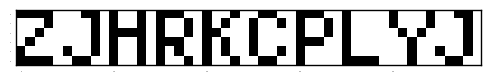

In [88]:
screen.plot()